In [3]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (20, 10)


In [4]:
df1=pd.read_csv('bengaluru_house_prices.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.shape  #Gives num of rows and col in the data set or table

(13320, 9)

In [6]:
df1.groupby('area_type')['area_type'].agg('count') #Grouping all the area types and performing aggregation like count to calculate the area type count

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns') #Axis is coloumns means we are going to drop col not rows axis=0 also works
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
#Data Cleaning 
#By knowing this we can get the count of the null values in each coloumns
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
#For those null its our wish and as per the data if the data is too large (in our case it is 13320)then these 73 nulls of bath is nothing so i can  drop them
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [11]:
df3['size'].unique() #it will give the unique values in the size col 

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:

#Here above some are  in BHK and Some are in bed room so i want to crate a new col which gives all in one format 
#The below function is used to split the first character from the BHK to extract which BHK it is 
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


C:\Users\bharath.kumar\AppData\Local\Temp\ipykernel_8308\2770786769.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [13]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
#based on condition if we want to see particluar  things 
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
#Here above for some of them we can see that not one value there is a range  value
#to convert them into single
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[-df3['total_sqft'].apply(is_float)].head(10) # i got the values which are not float 

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [19]:
def convert_sqft_to_num(x):
    tokens = x.split(' - ')  # Split the string by ' - '
    
    # Check if the input is in the range format (e.g., '3067 - 8156')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2  # Convert both to float and then calculate the average
    
    try:
        return float(x)  # If it's a valid single number, just convert to float
    except:
        return None  # If there's an error, return None


In [20]:
convert_sqft_to_num('64664646') #checking weather it is converting into float or not

64664646.0

In [21]:
convert_sqft_to_num('3067 - 8156')

5611.5

In [22]:
df4=df3.copy()
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [23]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [24]:
#Calcuating Price Per Sqft
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [25]:
#Here we cant use count becoz the function gives numpy array ('numpy.ndarray' object has no attribute 'count') where count is an dataframe function
len(df5['location'].unique()) 

1304

In [26]:
#To ensure spelling checks  like  whitefiled=1 and whitefeild=535
df5['location'] = df5['location'].str.replace('whitefiled', 'Whitefield', case=False)
df5['location'].nunique()


1303

In [27]:
df5['location'].nunique() #Both are similar 

1303

In [28]:
#So above we can know that we have 1304 unique locations 
#Now we can count the occurence of unique locations before that we can trim the trailing and leading spaces for location names 
df5.location=df5.location.apply(lambda  x:x.strip())
len(df5['location'].unique())   #Here we can see that diff of unique values count before and after strip 


1292

In [29]:
#Now we can count the occurence of ea ch unique location 
#groupby() takes the values of the column and creates groups based on those unique values
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               536
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
white field,kadugodi       1
Name: location, Length: 1292, dtype: int64

In [30]:
#Now i will check for locations whose count is leass than or equal to 10 and conisder them as other locations 
#it allows us to simplify the locations when we have large num of unique values 
len(location_stats[location_stats<=10])

1051

In [31]:
location_stats_lessthan_10=location_stats[location_stats<=10]
location_stats_lessthan_10

location
Gunjur Palya             10
Nagappa Reddy Layout     10
Dodsworth Layout         10
BTM 1st Stage            10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
white field,kadugodi      1
Name: location, Length: 1051, dtype: int64

In [32]:
len(df5.location.unique())

1292

In [33]:
df5.location=df5.location.apply(lambda x:'other' if x in location_stats_lessthan_10 else x)
df5.location.nunique() #now we can see that reduced unique locations

242

In [34]:
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [35]:
#finding the properties whose total sqft per bhk is less than 300
#based on having info we can treat them having less than 300 sqft per bhk is treated as the data errors or outliers or animoles etc as per real time info
#so we are going to remove them
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [36]:
df5.shape

(13246, 7)

In [37]:
#Now i will filter all those having less than 300 sqft per bhk
#using bitwise not operator (~) we get new data frame from df5 by filtering them
df6=df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

In [39]:
#we need to find the price per sqft 
#describe function give detail report 
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
#here removing the rows of locations where those price is too high (greater than m+st) and too less (m-st)

def remove_pps_outliers(df):
    df_out=pd.DataFrame() #After filtering the outliers for the current location, reduced_df is concatenated to df_out
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft > (m-st))& (subdf.price_per_sqft <= (m+st)) ]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)
df7.shape


(10242, 7)

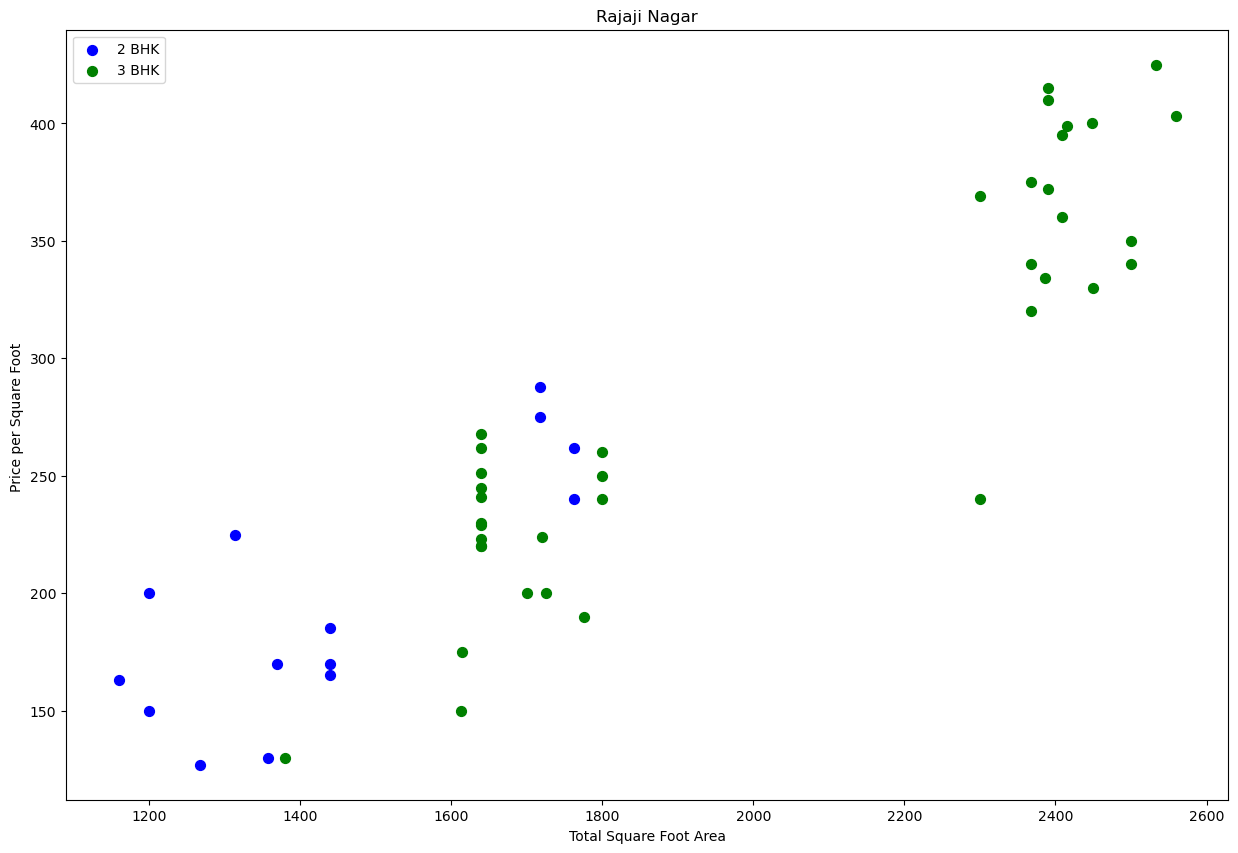

In [50]:

#Scatter plot to visualize the prices propertys having 2bhk price more than 3 bhk for a given location
#this function takes location as input and plots the 3bhk and 2 bhk prices 
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,color='green',label='3 BHK',s=50)
    plt.xlabel("Total Square Foot Area")
    plt.ylabel("Price per Square Foot ")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(df7,"Rajaji Nagar")
    

#here below we can see that at 1600 to 1800 region th price of 2BHK id Greater than # BHK
#so i want to remove those kind of outliers 

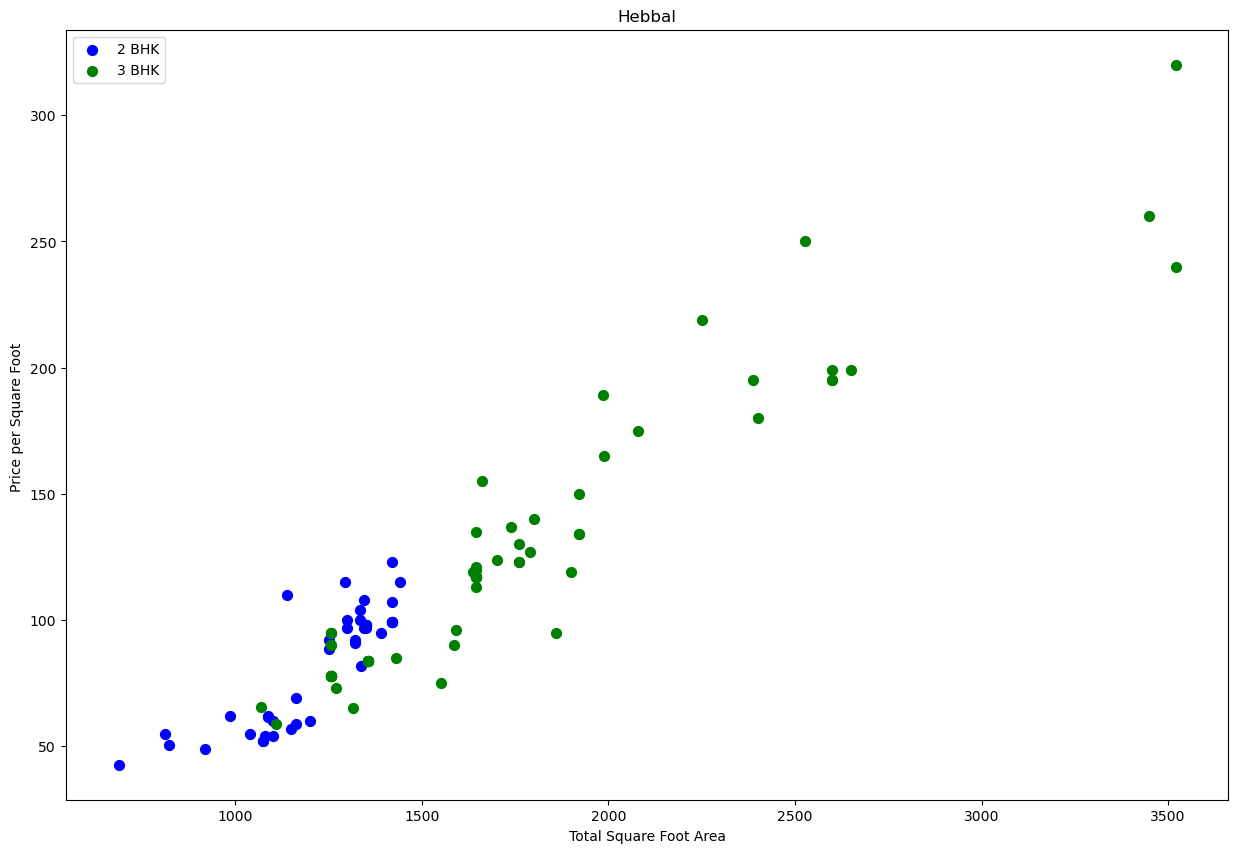

In [74]:
#Not only that every location have such kind of outliers
plot_scatter_chart(df7,"Hebbal")

In [78]:
'''The function aims to identify and remove properties that have a lower price per square foot (price_per_sqft) than the 
mean price per square foot of the previous BHK category (e.g., for 3 BHK properties, it checks the mean price of 2 BHK properties)
Prevous for df7 we have (10242, 7) rows and col now after filtering we have (7330, 7) rows and cols'''

def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats =bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

df8=remove_bhk_outliers(df7)
df8.shape




(7330, 7)

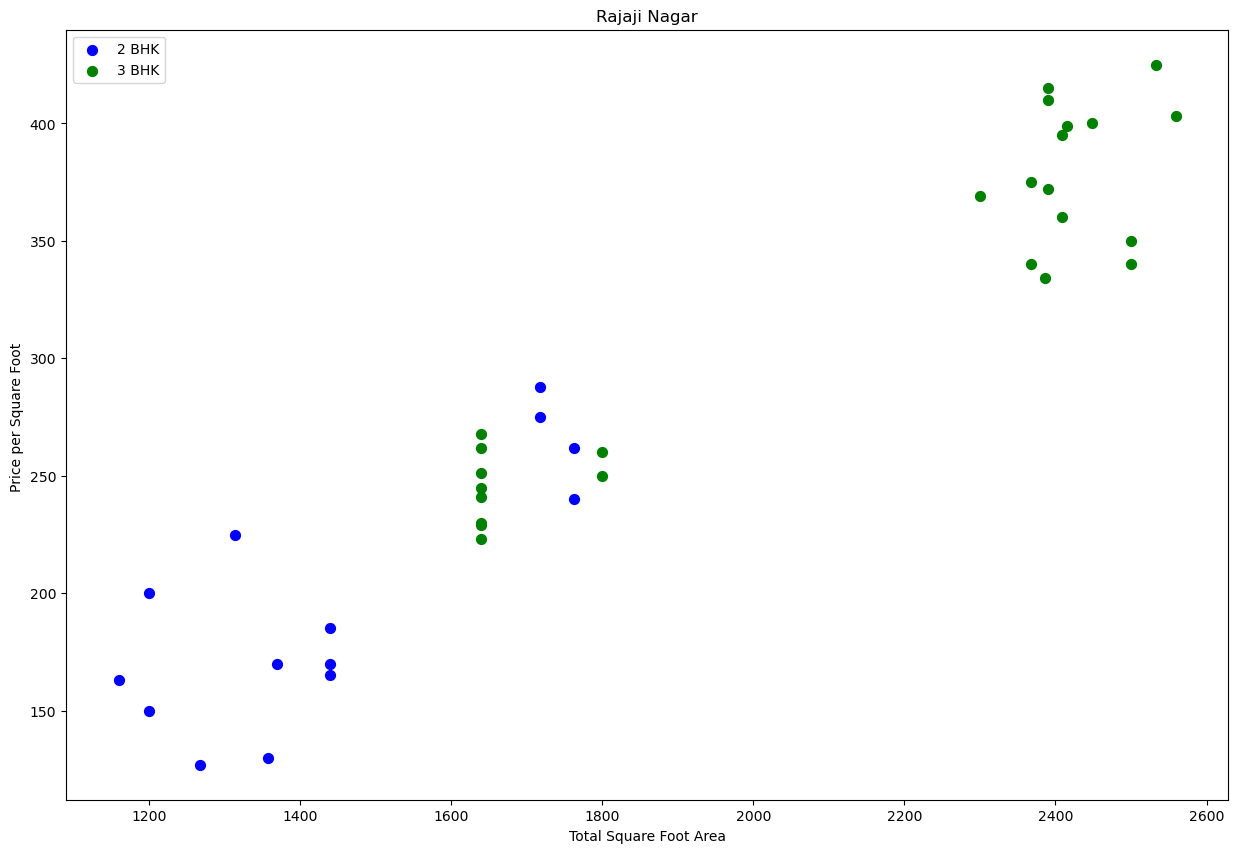

In [79]:
plot_scatter_chart(df8,"Rajaji Nagar")

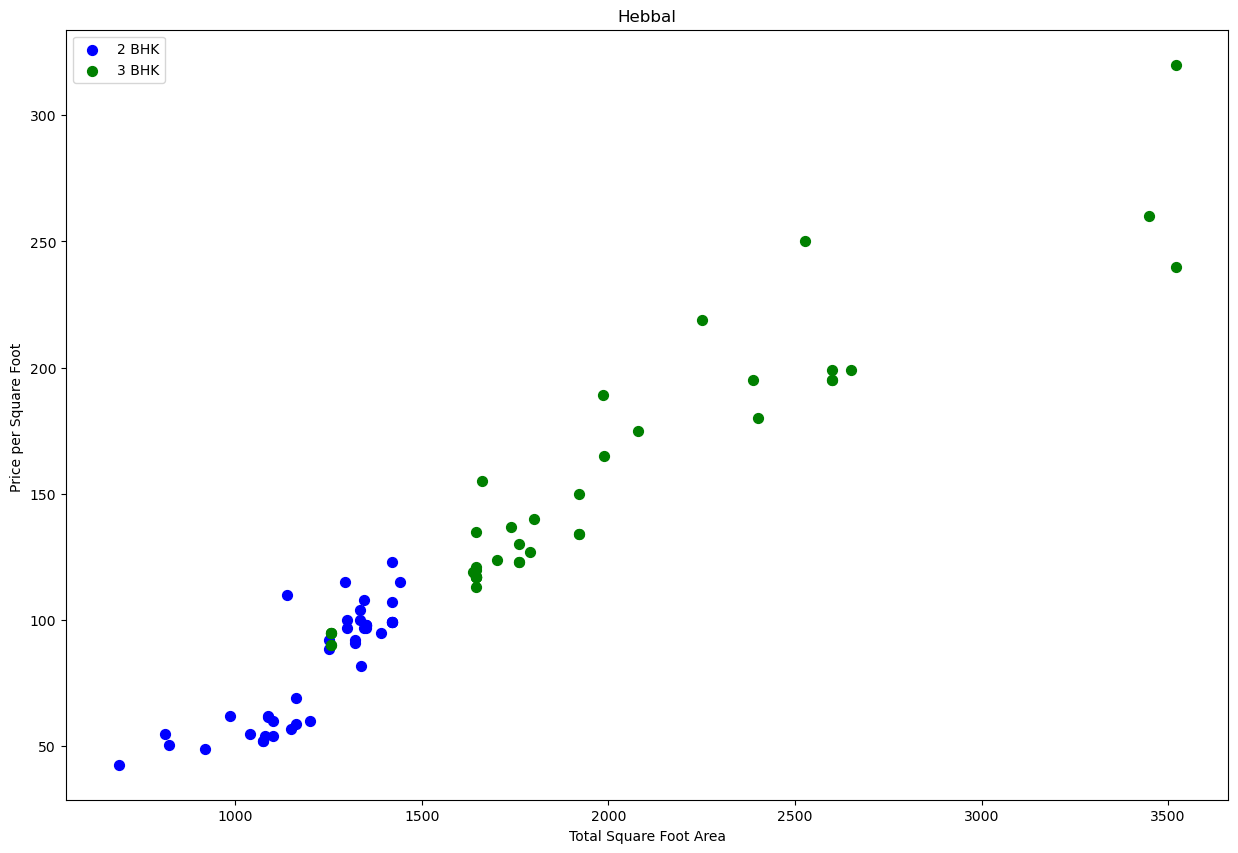

In [81]:
#Here tha data points have gone which having price of 3 bhk less than mean of 2bhk like that 
plot_scatter_chart(df8,"Hebbal")

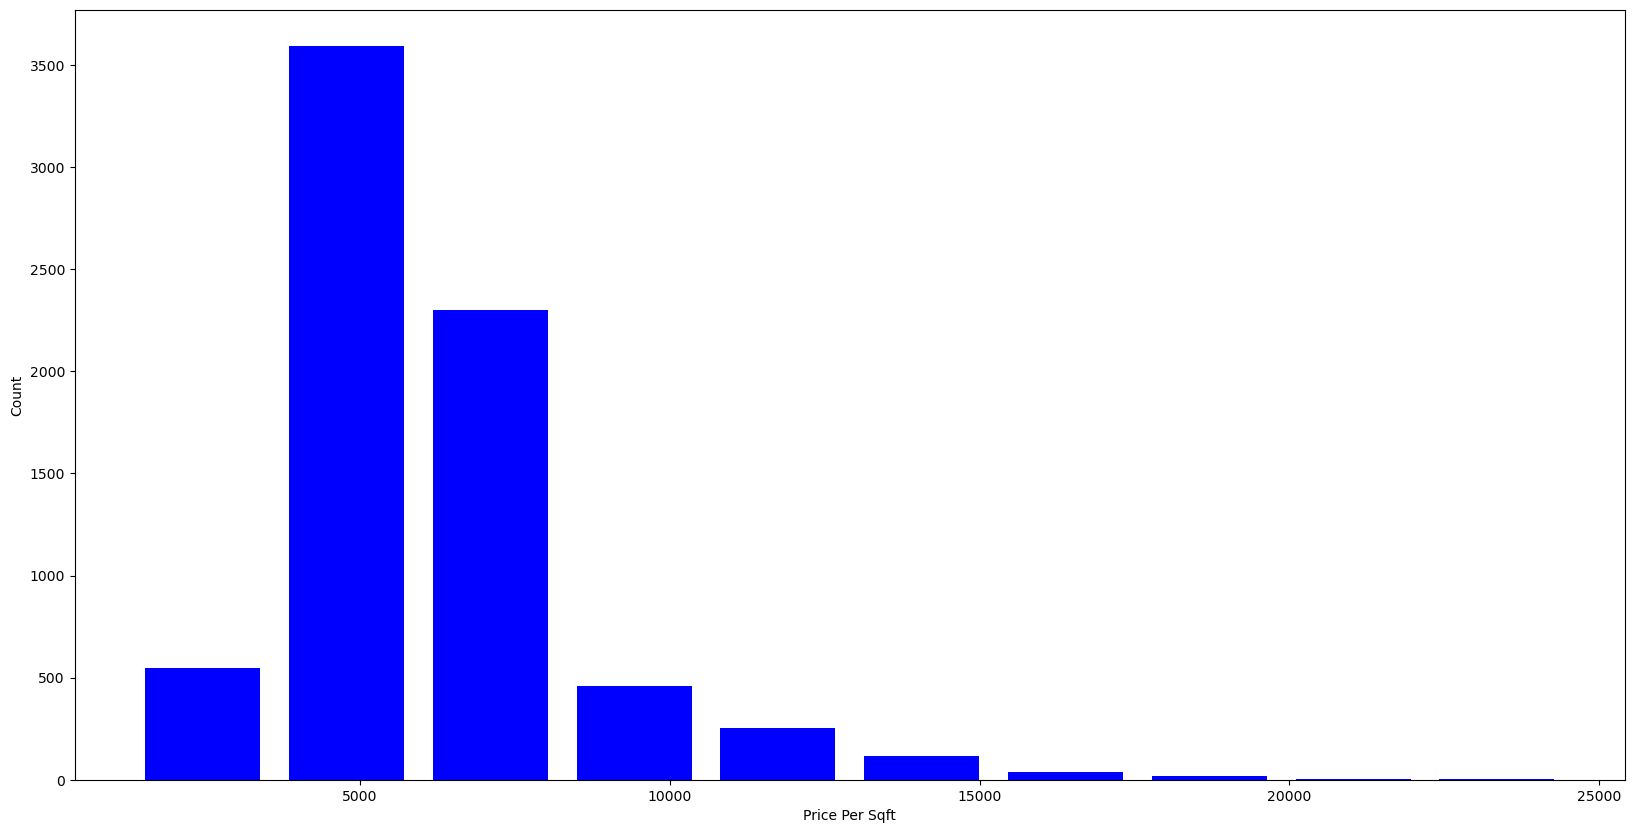

In [82]:
import matplotlib.pyplot as plt
matplotlib.rcParams["figure.figsize"] = (20, 10)
plt.hist(df8.price_per_sqft,rwidth=0.8,color='blue')
plt.xlabel("Price Per Sqft")
plt.ylabel("Count")
plt.show()

In [83]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [84]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8487,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8576,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9309,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9640,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


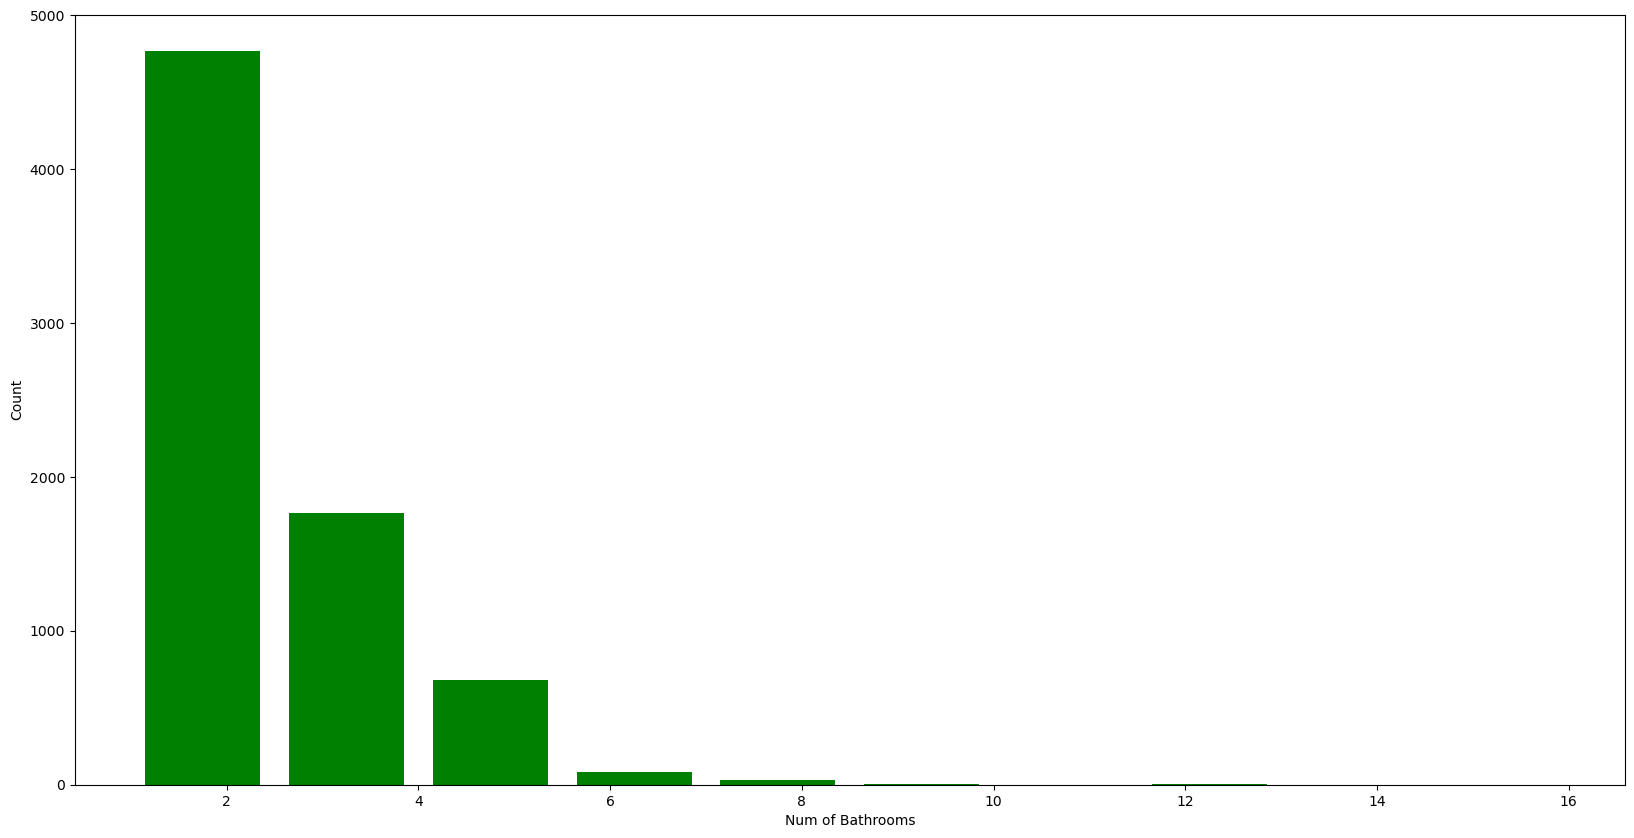

In [85]:
#Plot the graph of bathrroms count
plt.hist(df8.bath,rwidth=0.8,color="green")
plt.xlabel("Num of Bathrooms")
plt.ylabel("Count")
plt.show()

In [87]:
'''see them having num of bathrooms greater than 
num of bed rooms +2'''

df8[df8.bath>df8.bhk+2]                                                                                                                                

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8412,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [88]:
'''After seeing that above list i got notices some of having more num of bathrroms
We came to one conclusion where if any propertey have num of bathrooms greater than 
num of bed rooms +2 then we will reove them'''

df9=df8[df8.bath<df8.bhk+2] #considering less than bhk+2
df9.shape


(7252, 7)

In [89]:
#Dropping unwanted cols
df10=df9.drop(['size','price_per_sqft'],axis=1)

df10.head(3)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [90]:
#Creating dummies nothing buty encoding the unique vallues to  locations
dummies = pd.get_dummies(df10['location'], drop_first=False)

# Display the first 3 rows of the dummy variable DataFrame
dummies = dummies.astype(int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [91]:
#Here im going to drop one col from the dummies that dropped col is represented by values of other cols 
df11 = pd.concat([df10, dummies.drop('other', axis='columns')], axis='columns')
df11.head(3)


,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
df12=df11.drop('location',axis='columns')
df12.head(3)


,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
df12.shape

(7252, 245)

In [95]:
# X variable should contain only independent vaiables so here except price all are independent variables so for x we drop price 
# Y is dependent variable  (Price) it varies based on sqft,area etcc
#The dependent variable is the one you are trying to predict or explain so we are trying to predict Price which is Y
X = df12.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Dependent Variable Y
y=df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [97]:
# Now We have the Dependent(Y) and Independent(X) variables 
#We need to divide them into training and Testing Data Set 
'''During training, the model "learns" patterns and relationships between the independent variables (features) and the dependent variable (target)'''
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [99]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train) #fit used to train the dataset using dependent and independent variables 
model.score(X_test,y_test) #To test the trained model on unseen data and gives score which is  R-squared score

'''The R-squared score is a statistical measure that explains how well the independent variables (features) 
in your regression model explain the variation in the dependent variable (target). In other words, R-squared 
gives us an indication of how well our model's predictions match the actual values'''


''' R-squared helps evaluate how well the model performs on unseen data (test data), 
and it reflects how well the model generalizes its learning from the training data to new, unseen data'''


' R-squared helps evaluate how well the model performs on unseen data (test data), \nand it reflects how well the model generalizes its learning from the training data to new, unseen data'

In [100]:
# Here below i got Array od 5 scores becoz n_splits=5
#Each value in the array represents the R-squared score of your model for each of the 5 train-test splits
#All values are in range of 84 to 89 which is best
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv =ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.81733162, 0.8378852 , 0.84838481, 0.86742196, 0.89101767])

In [102]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

def find_best_model_using_gridsearchcv(X, y):
    # Define the algorithms and parameter grids
    algos = {
        'linear_regression': {
            'model': make_pipeline(StandardScaler(), LinearRegression()),
            'params': {
                'linearregression__fit_intercept': [True, False]  # Using step name 'linearregression'
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # Adjusted criterion name
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []  # List to store results

    # ShuffleSplit cross-validation
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    # Iterate over each algorithm and its configuration
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        
        # Append the results (model name, best score, and best parameters)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    # Return the results as a DataFrame
    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# Call the function and display the DataFrame
result_df = find_best_model_using_gridsearchcv(X, y)
result_df


,model,best_score,best_params
0,linear_regression,0.852408,{'linearregression__fit_intercept': True}
1,lasso,0.727153,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.786847,"{'criterion': 'squared_error', 'splitter': 'be..."


In [104]:
# Assuming df is your DataFrame
#X_columns = df.columns.tolist()
X.columns


Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [108]:
def predict_price(location, sqft, bath, bhk):    
    loc_index = np.where(X.columns == location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    predicted_price = model.predict([x])[0]  # Removed the extra closing parenthesis here
    return f"₹{predicted_price} Lakhs"


In [110]:
predict_price('Whitefield',1000,3,3)

C:\Users\bharath.kumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'₹50.16433551453302 Lakhs'

In [116]:
predict_price('Vijayanagar',1000,3,3)

C:\Users\bharath.kumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'₹59.94156038502106 Lakhs'

In [121]:
predict_price('Vijayanagar',1000,3,3)

C:\Users\bharath.kumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'₹59.94156038502106 Lakhs'

In [122]:
predict_price('Yelahanka New Town',1000,3,3)                                                                               

C:\Users\bharath.kumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'₹52.486239581528224 Lakhs'

In [123]:
predict_price('Koramangala',1000,3,3)

C:\Users\bharath.kumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'₹132.11113243670255 Lakhs'

In [124]:
predict_price('Koramangala',1000,3,3)                                       

C:\Users\bharath.kumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'₹132.11113243670255 Lakhs'

In [125]:
predict_price('Indira Nagar',1000,3,3)   

C:\Users\bharath.kumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'₹184.53148762402984 Lakhs'

In [126]:
predict_price('Indira Nagar',2000,5,3) 

C:\Users\bharath.kumar\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'₹275.7171397689905 Lakhs'